# 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mpld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 4.8 MB/s 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [ ]:
from sklearn import datasets
import csv
dt=pd.read_csv('/content/drive/MyDrive/머신러닝및딥러닝/프로젝트/bc_data.csv',header=0)
dt.drop(['Unnamed: 0'],axis=1,inplace=True)

dt.head()

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,CSF2,SLC2A11,GRIP2,GPLD1,RAB8A,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
0,1.219417,-0.15225,2.193375,-0.21875,-0.148667,-1.95500,0.210833,0.42975,-0.970875,0.5230,...,-1.11225,-0.212333,-0.33500,-1.328000,-0.0455,1.68925,2.3849,-0.3681,-0.2500,-1.2010
1,0.430333,0.44450,-0.100625,-0.16750,-0.206000,-2.01850,0.142500,-0.90075,-2.210625,0.4970,...,-0.91500,0.009333,0.23275,-1.152167,-0.0916,2.41500,1.9061,0.0628,-0.5125,-0.7830
2,0.439833,1.88225,0.055625,-0.02600,0.970167,-3.25750,-0.194333,-0.73925,-0.200375,0.2415,...,-1.54375,0.476167,-0.65425,-1.312500,-0.1634,2.02300,-0.0164,0.0586,-1.0520,-0.1376
3,1.242667,1.78100,0.269500,0.14975,-1.073167,-2.74075,0.379667,-0.23675,-1.778500,0.7610,...,-0.51950,0.231333,-0.10100,0.157833,0.5051,2.98450,0.2366,0.4729,-1.7740,0.9057
4,-0.228333,0.53350,0.722375,0.42750,-0.283667,-1.84800,-0.554000,0.09875,-1.851000,0.7265,...,-1.92125,1.157833,-0.49950,0.043833,-0.7107,1.50475,-0.0900,-0.1396,-0.2945,-1.2060


In [ ]:
a=[]
for i in range(529):
  a.append('T')
for i in range(61):
  a.append('N')

dt['diagnosis']=a
dt.head()

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,SLC2A11,GRIP2,GPLD1,RAB8A,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,diagnosis
0,1.219417,-0.15225,2.193375,-0.21875,-0.148667,-1.95500,0.210833,0.42975,-0.970875,0.5230,...,-0.212333,-0.33500,-1.328000,-0.0455,1.68925,2.3849,-0.3681,-0.2500,-1.2010,T
1,0.430333,0.44450,-0.100625,-0.16750,-0.206000,-2.01850,0.142500,-0.90075,-2.210625,0.4970,...,0.009333,0.23275,-1.152167,-0.0916,2.41500,1.9061,0.0628,-0.5125,-0.7830,T
2,0.439833,1.88225,0.055625,-0.02600,0.970167,-3.25750,-0.194333,-0.73925,-0.200375,0.2415,...,0.476167,-0.65425,-1.312500,-0.1634,2.02300,-0.0164,0.0586,-1.0520,-0.1376,T
3,1.242667,1.78100,0.269500,0.14975,-1.073167,-2.74075,0.379667,-0.23675,-1.778500,0.7610,...,0.231333,-0.10100,0.157833,0.5051,2.98450,0.2366,0.4729,-1.7740,0.9057,T
4,-0.228333,0.53350,0.722375,0.42750,-0.283667,-1.84800,-0.554000,0.09875,-1.851000,0.7265,...,1.157833,-0.49950,0.043833,-0.7107,1.50475,-0.0900,-0.1396,-0.2945,-1.2060,T


In [ ]:
dt['diagnosis'] = dt['diagnosis'].map({'T':1,'N':0})
dt.head()

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,SLC2A11,GRIP2,GPLD1,RAB8A,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,diagnosis
0,1.219417,-0.15225,2.193375,-0.21875,-0.148667,-1.95500,0.210833,0.42975,-0.970875,0.5230,...,-0.212333,-0.33500,-1.328000,-0.0455,1.68925,2.3849,-0.3681,-0.2500,-1.2010,1
1,0.430333,0.44450,-0.100625,-0.16750,-0.206000,-2.01850,0.142500,-0.90075,-2.210625,0.4970,...,0.009333,0.23275,-1.152167,-0.0916,2.41500,1.9061,0.0628,-0.5125,-0.7830,1
2,0.439833,1.88225,0.055625,-0.02600,0.970167,-3.25750,-0.194333,-0.73925,-0.200375,0.2415,...,0.476167,-0.65425,-1.312500,-0.1634,2.02300,-0.0164,0.0586,-1.0520,-0.1376,1
3,1.242667,1.78100,0.269500,0.14975,-1.073167,-2.74075,0.379667,-0.23675,-1.778500,0.7610,...,0.231333,-0.10100,0.157833,0.5051,2.98450,0.2366,0.4729,-1.7740,0.9057,1
4,-0.228333,0.53350,0.722375,0.42750,-0.283667,-1.84800,-0.554000,0.09875,-1.851000,0.7265,...,1.157833,-0.49950,0.043833,-0.7107,1.50475,-0.0900,-0.1396,-0.2945,-1.2060,1


In [ ]:
dt.describe()

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,SLC2A11,GRIP2,GPLD1,RAB8A,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,diagnosis
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,...,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.259592,0.833478,0.452664,0.053321,0.378982,-1.529667,-0.198501,0.077603,-0.403611,0.442859,...,0.003132,-0.243666,-0.535855,0.239612,2.081192,0.595468,0.032038,0.124982,-0.212182,0.896610
std,0.556094,0.830893,0.514285,0.614508,0.966953,1.080759,0.472994,0.494441,1.126378,0.411658,...,0.460586,0.340626,0.866525,0.541019,0.685738,1.797342,0.443948,1.497502,0.847745,0.304726
min,-1.718500,-1.412750,-1.025875,-1.726250,-2.284667,-5.026750,-1.737500,-1.511250,-2.807000,-1.200000,...,-1.723833,-2.050500,-2.710833,-1.923800,-0.748250,-3.713800,-1.500000,-2.528000,-2.151600,0.000000
25%,-0.115417,0.216188,0.105375,-0.355625,-0.297125,-2.199688,-0.467750,-0.245688,-1.406500,0.210125,...,-0.305417,-0.413250,-1.130833,-0.088150,1.702750,-0.795625,-0.276525,-0.857500,-0.825550,1.000000
50%,0.256750,0.836375,0.422000,0.107125,0.434667,-1.860375,-0.208250,0.086500,-0.217750,0.422750,...,0.008500,-0.228750,-0.624583,0.243150,2.144375,0.462200,0.005300,-0.399500,-0.274600,1.000000
75%,0.581437,1.422750,0.755031,0.462813,1.078750,-1.299250,0.093000,0.430750,0.430563,0.622375,...,0.254000,-0.044312,-0.023375,0.591525,2.569750,1.927925,0.271950,0.679250,0.318700,1.000000
max,2.901167,3.220250,2.522000,1.800500,3.825667,2.572500,1.361667,1.941750,2.381429,3.907000,...,1.841333,1.221000,2.767667,2.315700,3.989250,4.755900,1.862000,5.615000,2.364500,1.000000


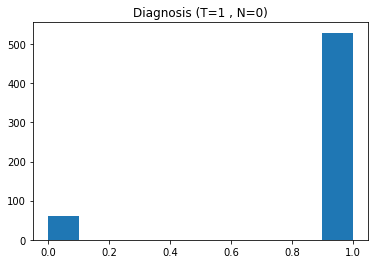

In [ ]:
plt.hist(dt['diagnosis'])
plt.title('Diagnosis (T=1 , N=0)')
plt.show()

In [ ]:
features_mean=list(dt.columns[1:11])
# split dataframe into two based on diagnosis
dtT=dt[dt['diagnosis'] == 1]
dtN=dt[dt['diagnosis'] == 0]

In [ ]:
traindt, testdt = train_test_split(dt, test_size = 0.3)

In [ ]:
dt.shape

(590, 17281)

In [ ]:
#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def classification_model(model, data, predictors, outcome):
  data_predictors = data[predictors].to_numpy()
  data_outcome = data[outcome].to_numpy()
  #Fit the model:
  model.fit(data_predictors,data_outcome)
  
  #Make predictions on training set:
  predictions = model.predict(data_predictors)
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data_outcome)
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))
  

  #Perform k-fold cross-validation with 5 folds
  print("Cross-Validation Score : ")
  for i in range(5):
    print(cross_val_score(model,data_predictors,data_outcome,cv=5)[i]*100,"%")
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data_predictors,data_outcome) 

Logistic Regression

In [ ]:
predictor_var=dt.columns[0:17280]
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindt,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 
100.0 %
100.0 %
98.79518072289156 %
100.0 %
100.0 %


Decision Tree

In [ ]:
model = DecisionTreeClassifier()
classification_model(model,traindt,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 
97.59036144578313 %
100.0 %
97.59036144578313 %
97.5609756097561 %
98.78048780487805 %


Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindt,predictor_var,outcome_var)

Accuracy : 98.789%
Cross-Validation Score : 
91.56626506024097 %
95.18072289156626 %
92.7710843373494 %
90.2439024390244 %
96.34146341463415 %


In [ ]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

SCARA5           0.010477
FAM82A           0.009649
FLJ40869         0.009245
PDE2A            0.008342
TTC28            0.007975
                   ...   
CASP7            0.000000
INOC1            0.000000
DKFZp451M2119    0.000000
USP53            0.000000
CTSC             0.000000
Length: 17280, dtype: float64


In [ ]:
featimp.head(50)

KRT15        0.010267
C13orf3      0.008532
ZFYVE21      0.008271
GTF3C4       0.007723
PHF17        0.007590
NPHP3        0.007188
BIRC5        0.007180
CLEC3B       0.006563
TGDS         0.006443
TTC26        0.006239
HIST2H2AC    0.006094
LRFN5        0.005896
MYOM1        0.005770
LOC92345     0.005735
CLIP3        0.005619
NLRX1        0.005537
OSTN         0.005489
PSMC4        0.005468
PLIN         0.005453
INTS7        0.005447
CCL21        0.005410
ETS2         0.005391
CDC25C       0.005355
SGCE         0.005285
ZNF677       0.005271
ARRDC3       0.005228
RPUSD1       0.005214
CIB1         0.005184
DPP6         0.005049
GPC3         0.004936
THRAP3       0.004707
FAM122B      0.004596
CYP51A1      0.004527
MPN2         0.004499
MFAP2        0.004470
C19orf23     0.004465
RUVBL1       0.004375
MRGPRF       0.004319
ARRDC1       0.004314
PAK2         0.004297
BDH2         0.004279
CKS2         0.004221
SUMF2        0.004181
HIST1H2BB    0.004162
LCA5         0.004120
CDC6      

In [ ]:
# Using top 5 features
predictor_var = ['KRT15','C13orf3','ZFYVE21','GTF3C4','PHF17',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,traindt,predictor_var,outcome_var)

Accuracy : 99.031%
Cross-Validation Score : 
97.59036144578313 %
96.3855421686747 %
97.59036144578313 %
96.34146341463415 %
98.78048780487805 %


In [ ]:
predictor_var = ['KRT15','C13orf3','ZFYVE21','GTF3C4','PHF17',]
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindt,predictor_var,outcome_var)

Accuracy : 97.821%
Cross-Validation Score : 
98.79518072289156 %
96.3855421686747 %
98.79518072289156 %
95.1219512195122 %
100.0 %


In [ ]:
predictor_var = ['KRT15','C13orf3','ZFYVE21','GTF3C4','PHF17',]
model = DecisionTreeClassifier()
classification_model(model,traindt,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 
96.3855421686747 %
96.3855421686747 %
97.59036144578313 %
95.1219512195122 %
98.78048780487805 %


In [ ]:
predictor_var = ['KRT15','C13orf3','ZFYVE21','GTF3C4','PHF17',]
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,testdt,predictor_var,outcome_var)

Accuracy : 98.305%
Cross-Validation Score : 
100.0 %
97.22222222222221 %
97.14285714285714 %
97.14285714285714 %
97.14285714285714 %


In [ ]:
predictor_var = ['KRT15','C13orf3','ZFYVE21','GTF3C4','PHF17',]
model = DecisionTreeClassifier()
classification_model(model,testdt,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 
97.22222222222221 %
97.22222222222221 %
94.28571428571428 %
97.14285714285714 %
94.28571428571428 %


In [ ]:
predictor_var = ['KRT15','C13orf3','ZFYVE21','GTF3C4','PHF17',]
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, testdt,predictor_var,outcome_var)

Accuracy : 98.870%
Cross-Validation Score : 
97.22222222222221 %
100.0 %
97.14285714285714 %
97.14285714285714 %
97.14285714285714 %
